# **Regressão Linear Múltipla**

In [1]:
import numpy as np
import pandas as pd

In [7]:
df_enem = pd.read_csv('C:/Users/Felipe Oliveira/Desktop/Data_Ciense/Regressão Linear/enem_2019_tratado_hipoteses.csv',
                    sep=',', encoding='iso-8859-1')

In [45]:
df_enem.head(20)

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,...,NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET
0,"1,90E+11",Santa Isabel,22,M,1,parda,1,1,não_respondeu,NaN,...,600.2,Inglês,1.0,160.0,200.0,180.0,200.0,200.0,940.0,Sim
1,"1,90E+11",São Paulo,17,F,1,parda,1,2,privada,15567761.0,...,731.8,Inglês,1.0,160.0,120.0,200.0,200.0,200.0,880.0,Não
2,"1,90E+11",São Bernardo do Campo,19,M,1,parda,1,2,pública,35904958.0,...,393.2,Espanhol,1.0,80.0,160.0,120.0,100.0,100.0,560.0,Sim
3,"1,90E+11",Embu-Guaçu,17,F,1,parda,1,2,pública,NaN,...,419.2,Inglês,1.0,120.0,120.0,120.0,120.0,80.0,560.0,Sim
4,"1,90E+11",Guarulhos,23,F,1,branca,1,1,não_respondeu,NaN,...,796.1,Inglês,1.0,160.0,200.0,180.0,180.0,160.0,880.0,Sim
5,"1,90E+11",São José do Rio Preto,18,F,1,branca,1,2,pública,35028927.0,...,612.8,Espanhol,1.0,120.0,160.0,120.0,80.0,100.0,580.0,Não
6,"1,90E+11",Franca,32,M,1,parda,1,1,não_respondeu,NaN,...,584.1,Espanhol,1.0,120.0,120.0,120.0,120.0,100.0,580.0,Sim
7,"1,90E+11",Santo André,20,F,1,parda,1,1,não_respondeu,NaN,...,508.5,Espanhol,1.0,120.0,120.0,120.0,100.0,80.0,540.0,Sim
8,"1,90E+11",São Paulo,26,M,1,branca,1,1,não_respondeu,NaN,...,681.2,Espanhol,1.0,180.0,200.0,200.0,200.0,120.0,900.0,Sim
9,"1,90E+11",Santo André,44,F,2,parda,1,1,não_respondeu,NaN,...,488.1,Espanhol,1.0,120.0,120.0,120.0,120.0,40.0,520.0,Sim


In [9]:
df_enem.shape

(499940, 28)

**Objetivo: Criar um modelo matemático de regressão linear múltipla para prever a nota de redação tendo como variáveis independentes as notas de seus componentes.**

**Selecionando apenas um dos colégios**

In [47]:
colegiox = df_enem.loc[df_enem.CO_ESCOLA == 35132287.0]

In [75]:
colegiox.head(40)

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,...,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET,previsao
17,"1,90E+11",São Paulo,18,F,1,branca,1,2,privada,35132287.0,...,Inglês,1.0,160.0,140.0,140.0,160.0,160.0,760.0,Sim,765.800864
10760,"1,90E+11",São Paulo,17,M,1,parda,1,2,privada,35132287.0,...,Inglês,1.0,180.0,200.0,200.0,200.0,140.0,920.0,Sim,939.726164
13315,"1,90E+11",São Paulo,17,F,1,branca,1,2,privada,35132287.0,...,Inglês,1.0,160.0,140.0,160.0,200.0,120.0,780.0,Sim,853.382235
20006,"1,90E+11",São Paulo,17,F,1,branca,1,2,privada,35132287.0,...,Inglês,1.0,140.0,180.0,160.0,180.0,140.0,800.0,Sim,867.154169
26697,"1,90E+11",São Paulo,18,F,1,branca,1,2,privada,35132287.0,...,Inglês,1.0,160.0,200.0,200.0,200.0,200.0,960.0,Sim,939.726164
26911,"1,90E+11",São Paulo,18,F,1,branca,1,2,privada,35132287.0,...,Inglês,1.0,160.0,120.0,160.0,160.0,180.0,780.0,Sim,737.019554
43814,"1,90E+11",São Paulo,18,M,1,branca,1,2,privada,35132287.0,...,Inglês,1.0,160.0,160.0,160.0,140.0,180.0,800.0,Sim,750.791488
43870,"1,90E+11",São Paulo,17,F,1,preta,2,2,privada,35132287.0,...,Inglês,1.0,140.0,200.0,160.0,180.0,180.0,860.0,Sim,895.935478
44150,"1,90E+11",São Paulo,17,F,1,amarela,1,2,privada,35132287.0,...,Inglês,1.0,160.0,200.0,200.0,200.0,200.0,960.0,Sim,939.726164
48417,"1,90E+11",São Paulo,17,M,1,branca,1,2,privada,35132287.0,...,Inglês,1.0,140.0,120.0,140.0,120.0,160.0,680.0,Sim,649.438183


In [51]:
colegiox.shape

(130, 28)

**Valores Missing**

In [52]:
colegiox.isnull().sum()

NU_INSCRICAO               0
NO_MUNICIPIO_RESIDENCIA    0
IDADE                      0
SEXO                       0
TP_ESTADO_CIVIL            0
RACA                       0
TP_NACIONALIDADE           0
TP_ST_CONCLUSAO            0
ESCOLA                     0
CO_ESCOLA                  0
NO_MUNICIPIO_ESC           0
TP_PRESENCA_CN             0
TP_PRESENCA_CH             0
TP_PRESENCA_LC             0
TP_PRESENCA_MT             0
NOTA_CN                    0
NOTA_CH                    0
NOTA_LC                    0
NOTA_MT                    0
TP_LINGUA                  0
TP_STATUS_REDACAO          0
COMP1                      0
COMP2                      0
COMP3                      0
COMP4                      0
COMP5                      0
NOTA_REDACAO               0
INTERNET                   0
dtype: int64

In [53]:
# Análise dos tipos de atributos.
colegiox.dtypes

NU_INSCRICAO                object
NO_MUNICIPIO_RESIDENCIA     object
IDADE                        int64
SEXO                        object
TP_ESTADO_CIVIL              int64
RACA                        object
TP_NACIONALIDADE             int64
TP_ST_CONCLUSAO              int64
ESCOLA                      object
CO_ESCOLA                  float64
NO_MUNICIPIO_ESC            object
TP_PRESENCA_CN               int64
TP_PRESENCA_CH               int64
TP_PRESENCA_LC               int64
TP_PRESENCA_MT               int64
NOTA_CN                    float64
NOTA_CH                    float64
NOTA_LC                    float64
NOTA_MT                    float64
TP_LINGUA                   object
TP_STATUS_REDACAO          float64
COMP1                      float64
COMP2                      float64
COMP3                      float64
COMP4                      float64
COMP5                      float64
NOTA_REDACAO               float64
INTERNET                    object
dtype: object

## **Regressão Múltipla - Statsmodels**

In [54]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

In [55]:
# Criação do modelo
modelo = smf.ols('NOTA_REDACAO ~ COMP2 + COMP4', data = colegiox).fit()

In [56]:
residuos = modelo.resid
residuos

17         -5.800864
10760     -19.726164
13315     -73.382235
20006     -67.154169
26697      20.273836
             ...    
426829     46.771131
428241    -69.438183
443242    -52.144793
462446   -118.372859
483420     47.855207
Length: 130, dtype: float64

### Teste de Normalidade dos resíduos

In [57]:
import scipy.stats as stats

Ho = distribuição normal : p > 0.05

Ha = distribuição != normal : p <= 0.05

In [58]:
estatistica, p = stats.shapiro(residuos)
print('Estatística de teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Estatística de teste: 0.9847790598869324
p-valor: 0.15594163537025452


In [59]:
import matplotlib.pyplot as plt

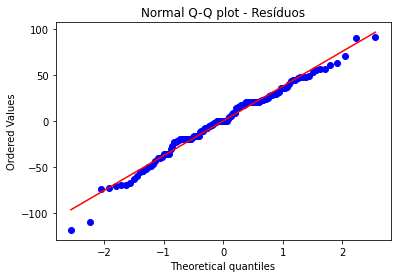

In [60]:
stats.probplot(residuos, dist="norm", plot=plt)
plt.title("Normal Q-Q plot - Resíduos")
plt.show()

### **Outliers nos resíduos**

(Entre -3 e 3)

In [61]:
outliers = modelo.outlier_test()

In [62]:
outliers.max()

student_resid    2.521846
unadj_p          0.994221
bonf(p)          1.000000
dtype: float64

In [63]:
outliers.min()

student_resid   -3.254277
unadj_p          0.001460
bonf(p)          0.189769
dtype: float64

### **Ausência de Multicolinearidade**

Somente entre as variáveis independentes.

Considerada multicolinearidade quando r > 0.9.

In [64]:
variaveis = colegiox[['COMP2','COMP4']]

In [65]:
variaveis.head()

,COMP2,COMP4
17,140.0,160.0
10760,200.0,200.0
13315,140.0,200.0
20006,180.0,180.0
26697,200.0,200.0


In [66]:
correlacoes = variaveis.corr(method='pearson')
correlacoes

,COMP2,COMP4
COMP2,1.000000,0.375906
COMP4,0.375906,1.000000


### **Análise do Modelo**

Análise do modelo

Intercept

p_valor para cada coeficiente < 0,05 (estatisticamente significativos).

Adjusted R-squared (explicação do modelo através dos dados).

p_valor da estatística F < 0.05 (valida o modelo de regressão).

In [67]:
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:           NOTA_REDACAO   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     314.2
Date:                Wed, 02 Nov 2022   Prob (F-statistic):           6.76e-50
Time:                        18:08:04   Log-Likelihood:                -655.51
No. Observations:                 130   AIC:                             1317.
Df Residuals:                     127   BIC:                             1326.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    214.0062     25.745      8.313      0.0

**Equação:** Nota Redação = 214,0062 + 1,4391.COMP2 + 2,1895.COMP4

In [68]:
# Criando uma coluna com previsão
colegiox['previsao'] = modelo.fittedvalues

C:\Users\Felipe Oliveira\AppData\Local\Temp\ipykernel_5984\1443314081.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  colegiox['previsao'] = modelo.fittedvalues


In [69]:
colegiox.head()

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,...,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET,previsao
17,"1,90E+11",São Paulo,18,F,1,branca,1,2,privada,35132287.0,...,Inglês,1.0,160.0,140.0,140.0,160.0,160.0,760.0,Sim,765.800864
10760,"1,90E+11",São Paulo,17,M,1,parda,1,2,privada,35132287.0,...,Inglês,1.0,180.0,200.0,200.0,200.0,140.0,920.0,Sim,939.726164
13315,"1,90E+11",São Paulo,17,F,1,branca,1,2,privada,35132287.0,...,Inglês,1.0,160.0,140.0,160.0,200.0,120.0,780.0,Sim,853.382235
20006,"1,90E+11",São Paulo,17,F,1,branca,1,2,privada,35132287.0,...,Inglês,1.0,140.0,180.0,160.0,180.0,140.0,800.0,Sim,867.154169
26697,"1,90E+11",São Paulo,18,F,1,branca,1,2,privada,35132287.0,...,Inglês,1.0,160.0,200.0,200.0,200.0,200.0,960.0,Sim,939.726164


## **Regressão Múltipla - Scikitlearn**

In [70]:
from sklearn.linear_model import LinearRegression

In [71]:
independente = colegiox[['COMP2','COMP4','COMP5']]


In [72]:
dependente = colegiox[['NOTA_REDACAO']]

In [40]:
modelo2 = LinearRegression()
modelo2.fit(independente, dependente)

LinearRegression()

In [73]:
modelo2.intercept_

array([49.64541484])

In [42]:
modelo2.coef_

array([[1.60470855, 1.84178144, 1.057756  ]])

In [43]:
print("Equação: NOTA REDAÇÃO = {:.2f} + {:.2f}*COMP2 + {:.2f}*COMP4 + {:.2f}*COMP5".format(modelo2.intercept_[0], modelo2.coef_[0][0], modelo2.coef_[0][1], modelo2.coef_[0][2]))

Equação: NOTA REDAÇÃO = 49.65 + 1.60*COMP2 + 1.84*COMP4 + 1.06*COMP5


In [74]:
modelo2.score(independente, dependente)

0.8801468336890843